# Project: - Customer Satisfaction Classification for Flipkart Support Interactions

- Project Type - Classification


## Project Introduction

Customer satisfaction is critical for the success of platforms, especially Big Tech MNCs like Flipkart.

This project aims to classify customer satisfaction levels based on their interactions with Flipkart support. By analyzing various factors such as channel of interaction, category and sub-category of issues, customer remarks, agent performance metrics (handling time, experience level, daily issue count), and temporal features (time of day, day of week), we will build a classification model to predict customer satisfaction scores. Using the provided dataset, loaded into a pandas DataFrame, we will specifically leverage the 'CSAT Score' to understand and predict customer satisfaction. This will help Flipkart identify key drivers of satisfaction and dissatisfaction, enabling targeted interventions to improve the customer support experience.

## Problem Statement
In an era where customer experience can make or break brand loyalty, Flipkart aims to enhance its customer service by accurately predicting customer satisfaction levels based on historical interaction data. The primary objective of this project is to build a machine learning classification model that can predict whether a customer will be satisfied or dissatisfied with a support interaction.
- This project will explore and identify key factors driving satisfaction.
The model's predictive capability will enable Flipkart to:
1. Proactively improve agent performance,
2. Identify areas for process optimization,
3. Personalize customer service experiences, and
4. Boost overall satisfaction metrics like the CSAT score.

This classification model will serve as a foundational tool for decision-making in Flipkart’s customer service strategy, helping to deliver more responsive and effective


## Business Use Cases
- Customer Feedback Routing: Automatically classify customer feedback as satisfied or dissatisfied to prioritize issue handling.
- Support Quality Analytics: Track satisfaction trends across teams and channels to improve agent training and resource allocation.
- Proactive Support Systems: Enable early detection of dissatisfaction to trigger escalation or personalized outreach.
- Agent Performance Evaluation: Use satisfaction classification as a quality metric to assess agent effectiveness.
- Smart CRM Integration: Help customer service tools adapt dynamically by learning from past satisfaction trends.


## Let's move ahead

### Importing the libraries

In [82]:
import pandas as pd
import numpy as np

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import joblib

In [85]:
customer_df = pd.read_csv('Customer_support_data.csv')
customer_df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [86]:
customer = customer_df.copy()

In [87]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [88]:
customer.duplicated().sum()

0

In [89]:
missing_percentage = customer.isnull().mean() * 100
print("The percentage of the missing values are : \n ",missing_percentage)

The percentage of the missing values are : 
  Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64


In [90]:
customer.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


| **Variable Name**         | **Description**                                                                  |
| ------------------------- | -------------------------------------------------------------------------------- |
| `Unique_id`               | Unique identifier assigned to each interaction record.                           |
| `channel_name`            | Name of the customer service channel (e.g., Email, Chat, Call).                  |
| `category`                | Broad classification of the interaction topic.                                   |
| `Sub-category`            | More specific classification within the main category.                           |
| `Customer Remarks`        | Open-ended feedback or comments provided by the customer.                        |
| `Order_id`                | Unique identifier for the order linked to the customer interaction.              |
| `order_date_time`         | Date and time when the order was placed.                                         |
| `Issue_reported at`       | Timestamp indicating when the issue was initially reported by the customer.      |
| `issue_responded`         | Timestamp indicating when the issue was responded to by support.                 |
| `Survey_response_Date`    | Date on which the customer responded to the feedback survey.                     |
| `Customer_City`           | City in which the customer resides.                                              |
| `Product_category`        | Category to which the product in question belongs.                               |
| `Item_price`              | Price of the individual item in the order.                                       |
| `connected_handling_time` | Total time taken by the agent to handle the issue (in minutes).                  |
| `Agent_name`              | Name of the customer service agent who handled the issue.                        |
| `Supervisor`              | Supervisor responsible for overseeing the agent.                                 |
| `Manager`                 | Manager in charge of the customer support operation.                             |
| `Tenure Bucket`           | Categorical value representing the agent’s experience/tenure (e.g., 0–6 months). |
| `Agent Shift`             | Shift during which the agent was working (e.g., Morning, Evening, Night).        |
| `CSAT Score`              | Numerical rating representing customer satisfaction (usually on a 1–5 scale).    |


## Univarient Analysis

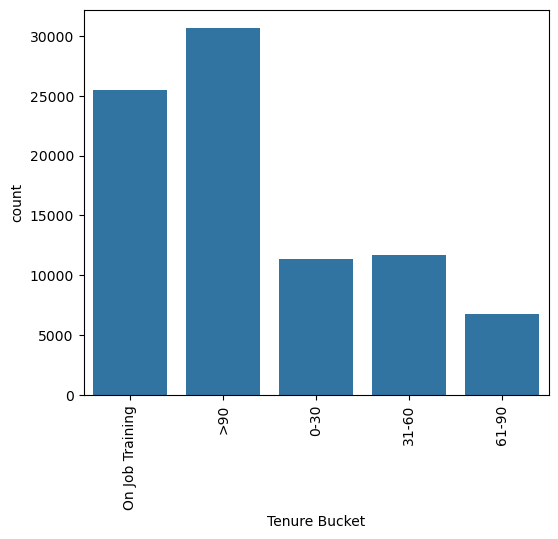

In [93]:
plt.figure(figsize=(6,5))
sns.countplot(data=customer,x='Tenure Bucket')
plt.xticks(rotation=90)
plt.show()

-  This chart shows the distribution of agents across different tenure buckets, indicating the experience levels of the support staff.

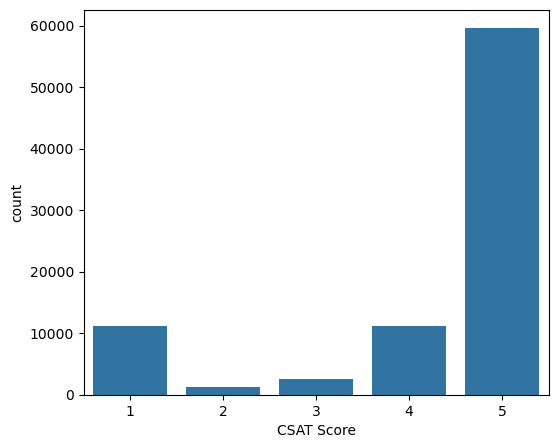

In [95]:
plt.figure(figsize=(6,5))
sns.countplot(data=customer,x='CSAT Score')
plt.show()

- This chart displays the distribution of CSAT scores, revealing the frequency of each satisfaction rating given by customers.

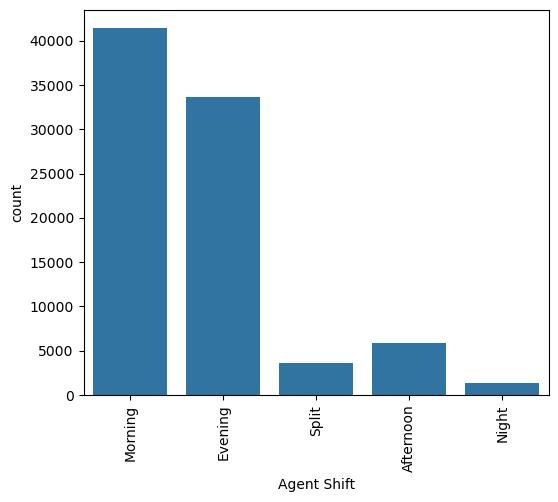

In [97]:
plt.figure(figsize=(6,5))
sns.countplot(data=customer,x='Agent Shift')
plt.xticks(rotation=90)
plt.show()

- This chart shows the distribution of interactions handled during different agent shifts, indicating the busiest periods and staffing levels.

In [99]:
fig = px.bar(
    customer['Sub-category'].value_counts().reset_index(),
    x='Sub-category',
    y='count',
    title='Sub-category Distribution',
    labels={'Sub-category': 'Sub-category', 'count': 'Count'}
)
fig.update_layout(
    xaxis_tickangle=-90,
    width=1000,
    height=500
)
fig.show()

- This interactive bar chart visualizes the distribution of customer issues across various sub-categories, identifying the most common types of problems reported.

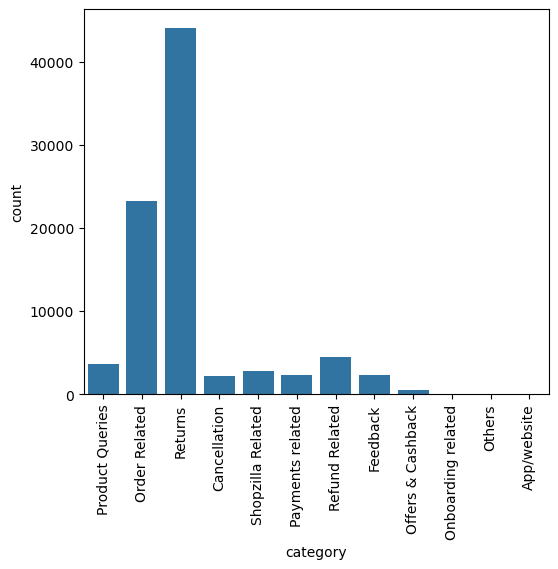

In [101]:
plt.figure(figsize=(6,5))
sns.countplot(data=customer,x='category')
plt.xticks(rotation=90)
plt.show()

- This chart presents the distribution of customer issues across different main categories, showing the broad areas where customers require support.

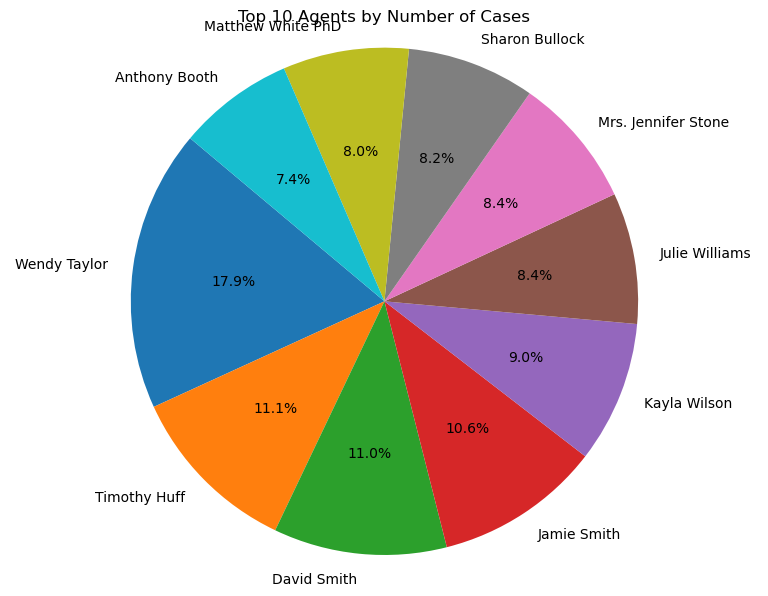

In [103]:
# Get top 10 agents by frequency
top_10_agents = customer['Agent_name'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(top_10_agents, labels=top_10_agents.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Agents by Number of Cases')
plt.axis('equal')  # Ensuring the pie is a circle
plt.tight_layout()
plt.show()

This chart displays the distribution of interactions handled by the top 10 agents, highlighting the agents with the highest volume of customer interactions.

In [105]:
customer.shape

(85907, 20)

In [106]:
customer['Order_id'].value_counts()

Order_id
c27c9bb4-fa36-4140-9f1f-21009254ffdb    1
b13cbde9-ffe7-41de-8b1c-a5547a1769b6    1
d7ae97cf-a6e9-4cd1-80d3-ae401b0e9302    1
22a084d7-c496-4d54-acdf-e444b43ed32d    1
e55d5ede-b2a4-4e84-91b7-e83f131922c2    1
                                       ..
7863c1a7-9ecf-4f40-beda-effc246e7da2    1
d37b0beb-78e2-45ec-87bb-1f858c035e9b    1
b299b282-30d7-4e69-b668-bacf56a64ada    1
d7e2716d-6cb5-40b1-8a21-99dccc1744a3    1
3230db30-f8da-4c44-8636-ec76d1d3d4f3    1
Name: count, Length: 67675, dtype: int64

In [107]:
customer['Customer Remarks'].value_counts()

Customer Remarks
Good                                    1390
Good                                    1158
Very good                                569
Nice                                     316
Thanks                                   276
                                        ... 
Happy bahat khusi hua                      1
My problem didn't solved                   1
Thanks to filpkard team                    1
Love you sir                               1
need to improve with proper details.       1
Name: count, Length: 18231, dtype: int64

In [108]:
customer['Agent_name'].value_counts()

Agent_name
Wendy Taylor         429
Timothy Huff         265
David Smith          264
Jamie Smith          253
Kayla Wilson         216
                    ... 
Amy Bell              20
John Torres           20
Stephanie Hammond     20
Summer Mitchell       20
Virginia Collins      20
Name: count, Length: 1371, dtype: int64

In [109]:
customer.drop(columns=['connected_handling_time'],axis=1,inplace=True) # droping the column as it is have 99.71% null values

In [110]:
# Calculate percentage of null values in 'Customer_City' column
missing_count = customer['Customer_City'].isna().sum()
total_count = len(customer)
missing_percentage = (missing_count / total_count) * 100

print(f"Missing values in 'Customer_City': {missing_count} out of {total_count} rows ({missing_percentage:.2f}%)")


Missing values in 'Customer_City': 68828 out of 85907 rows (80.12%)


In [111]:
# Count and print the number of null values in 'Customer_City' column
null_count = customer['Customer_City'].isnull().sum()
print(f"Number of null values in 'Customer_City' column: {null_count}")

Number of null values in 'Customer_City' column: 68828


In [112]:
# Fill missing values in 'Customer_City' with 'Not Given'
customer['Customer_City'] = customer['Customer_City'].fillna('Not Given')

# Count and print the number of null values in 'Product_category' column
null_count = customer['Product_category'].isnull().sum()
print(f"Number of null values in 'Product_category' column: {null_count}")

Number of null values in 'Product_category' column: 68711


In [113]:
# Fill missing values in 'Product_category' with 'Not Available'
customer['Product_category'] = customer['Product_category'].fillna('Not Available')


In [114]:
customer['Item_price'].isnull().sum()
print(f"Total number  of Null or missing values of Item_price Column are : {customer['Item_price'].isnull().sum()}")

Total number  of Null or missing values of Item_price Column are : 68701


In [115]:
# Fill missing values in 'Item_price' with 0 (assumes missing price means free or unknown)
customer['Item_price'] = customer['Item_price'].fillna(0)
customer = customer.infer_objects(copy=False)
#Converting  object-type columns to more specific types (like int, float)

In [116]:
customer.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,Not Given,Not Available,0.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,Not Given,Not Available,0.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,Not Given,Not Available,0.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,Not Given,Not Available,0.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,Not Given,Not Available,0.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


## Feature Engineering

In [118]:
customer['Issue_reported at'] = pd.to_datetime(customer['Issue_reported at'], format='%d/%m/%Y %H:%M')
customer['Issue_reported_date'] = customer['Issue_reported at'].dt.date
customer['Issue_reported_time'] = customer['Issue_reported at'].dt.time

In [119]:
customer['Issue_reported_date'] = pd.to_datetime(customer['Issue_reported_date'])
customer['Issue_reported_day'] = customer['Issue_reported_date'].dt.day
customer['Issue_reported_day_Name'] = customer['Issue_reported_date'].dt.day_name()
customer['Issue_reported_month'] = customer['Issue_reported_date'].dt.month_name()
customer['Issue_reported_year'] = customer['Issue_reported_date'].dt.year

In [120]:
customer['issue_responded'] = pd.to_datetime(customer['issue_responded'], format='%d/%m/%Y %H:%M')
customer['issue_responded_date'] = customer['issue_responded'].dt.date
customer['issue_responded_time'] = customer['issue_responded'].dt.time

In [121]:
customer['Survey_response_Date'] = pd.to_datetime(customer['Survey_response_Date'], format='%d-%b-%y', dayfirst=True, errors='coerce')
customer['Survey_response_Date_date'] = customer['Survey_response_Date'].dt.date
customer['Survey_response_Date_time'] = customer['Survey_response_Date'].dt.time

In [122]:
customer['Survey_response_Date_date'] = pd.to_datetime(customer['Survey_response_Date_date'])
customer['Survey_response_Day_Name'] = customer['Survey_response_Date_date'].dt.day_name()
customer['Survey_response_Date_month'] = customer['Survey_response_Date_date'].dt.month_name()
customer['Survey_response_Date_year'] = customer['Survey_response_Date_date'].dt.year
customer['Survey_response_Day'] = customer['Survey_response_Date_date'].dt.day # Extract the day number into a new column

In [123]:
customer.drop(columns=['Issue_reported at','issue_responded','Survey_response_Date'],axis=1,inplace=True)

In [124]:
def time_to_minutes(time_obj): # Converts a datetime.time object to total minutes from the start of the day.
  if isinstance(time_obj, datetime.time):
    return time_obj.hour * 60 + time_obj.minute + time_obj.second / 60
  return None # Handle potential non-time values

In [125]:
customer['Issue_reported_time_minutes'] = customer['Issue_reported_time'].apply(time_to_minutes)
customer['issue_responded_time_minutes'] = customer['issue_responded_time'].apply(time_to_minutes)

customer['Handling_Time_minutes'] = customer['issue_responded_time_minutes'] - customer['Issue_reported_time_minutes']

# Replace negative handling times with NaN
customer['Handling_Time_minutes'] = customer['Handling_Time_minutes'].apply(lambda x: x if x >= 0 else np.nan)

In [126]:
customer['Survey_response_Day_Name'] = customer['Survey_response_Date_date'].dt.day_name()
customer['Survey_response_Date_month'] = customer['Survey_response_Date_date'].dt.month_name()
customer['Survey_response_Date_year'] = customer['Survey_response_Date_date'].dt.year
customer['Survey_response_Day'] = customer['Survey_response_Date_date'].dt.day # Extract the day number into a new column

In [127]:
# Display only columns with missing values
missing_cols = customer.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]

if not missing_cols.empty:
    print("Columns with missing values:\n")
    print(missing_cols)
else:
    print(" No missing values remaining in the DataFrame.")


Columns with missing values:

Customer Remarks         57165
Order_id                 18232
order_date_time          68693
Handling_Time_minutes     9316
dtype: int64


In [128]:
median_handling_time = customer['Handling_Time_minutes'].median()
customer['Handling_Time_minutes'].fillna(median_handling_time)
print(customer['Handling_Time_minutes'].isnull().sum())

9316


In [129]:
customer.drop(columns=['order_date_time'],axis=1,inplace=True)

In [130]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unique id                     85907 non-null  object        
 1   channel_name                  85907 non-null  object        
 2   category                      85907 non-null  object        
 3   Sub-category                  85907 non-null  object        
 4   Customer Remarks              28742 non-null  object        
 5   Order_id                      67675 non-null  object        
 6   Customer_City                 85907 non-null  object        
 7   Product_category              85907 non-null  object        
 8   Item_price                    85907 non-null  float64       
 9   Agent_name                    85907 non-null  object        
 10  Supervisor                    85907 non-null  object        
 11  Manager                     

In [131]:
customer['Tenure Bucket'].value_counts()

Tenure Bucket
>90                30660
On Job Training    25523
31-60              11665
0-30               11318
61-90               6741
Name: count, dtype: int64

In [132]:
def map_experience(bucket):
  if bucket in ['On Job Training','0-30']:
    return 'New'
  elif bucket in ['31-60','61-90']:
    return 'Mid'
  else:
    return 'Experienced'

customer['Agent Experience Level'] = customer['Tenure Bucket'].apply(map_experience)

In [133]:
workload = customer.groupby(['Agent_name','Issue_reported_date']).size().reset_index(name='Daily Issue Count').sort_values(by='Daily Issue Count',ascending=False)
customer = customer.merge(workload,on=['Agent_name','Issue_reported_date'],how='left')

In [134]:
monthly_summary = customer.groupby('Issue_reported_month')['CSAT Score'].mean()

In [135]:
def handle_bucket(x):
  if x>=1 and x<=20:
    return 'Quick'
  elif x>=20 and x<=35:
    return 'Medium'
  else:
    return 'Lengthy'
customer['Handling Bucket'] = customer['Handling_Time_minutes'].apply(handle_bucket)

In [136]:
customer['Is_Weekend'] = customer['Issue_reported_day_Name'].isin(['Saturday', 'Sunday'])


In [137]:
monthly_summary

Issue_reported_month
August    4.244469
July      3.456349
Name: CSAT Score, dtype: float64

In [138]:
display("Data:",customer.head())

'Data:'

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Customer_City,Product_category,Item_price,Agent_name,...,Survey_response_Date_month,Survey_response_Date_year,Survey_response_Day,Issue_reported_time_minutes,issue_responded_time_minutes,Handling_Time_minutes,Agent Experience Level,Daily Issue Count,Handling Bucket,Is_Weekend
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,Not Given,Not Available,0.0,Richard Buchanan,...,August,2023,1,673.0,707.0,34.0,New,1,Medium,False
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,Not Given,Not Available,0.0,Vicki Collins,...,August,2023,1,772.0,774.0,2.0,Experienced,9,Quick,False
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,Not Given,Not Available,0.0,Duane Norman,...,August,2023,1,1216.0,1238.0,22.0,New,2,Medium,False
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,Not Given,Not Available,0.0,Patrick Flores,...,August,2023,1,1256.0,1276.0,20.0,Experienced,5,Quick,False
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,Not Given,Not Available,0.0,Christopher Sanchez,...,August,2023,1,630.0,632.0,2.0,New,5,Quick,False


In [139]:
customer['Customer Remarks'].value_counts(normalize=True)

Customer Remarks
Good                                    0.048361
Good                                    0.040289
Very good                               0.019797
Nice                                    0.010994
Thanks                                  0.009603
                                          ...   
Happy bahat khusi hua                   0.000035
My problem didn't solved                0.000035
Thanks to filpkard team                 0.000035
Love you sir                            0.000035
need to improve with proper details.    0.000035
Name: proportion, Length: 18231, dtype: float64

In [140]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unique id                     85907 non-null  object        
 1   channel_name                  85907 non-null  object        
 2   category                      85907 non-null  object        
 3   Sub-category                  85907 non-null  object        
 4   Customer Remarks              28742 non-null  object        
 5   Order_id                      67675 non-null  object        
 6   Customer_City                 85907 non-null  object        
 7   Product_category              85907 non-null  object        
 8   Item_price                    85907 non-null  float64       
 9   Agent_name                    85907 non-null  object        
 10  Supervisor                    85907 non-null  object        
 11  Manager                     

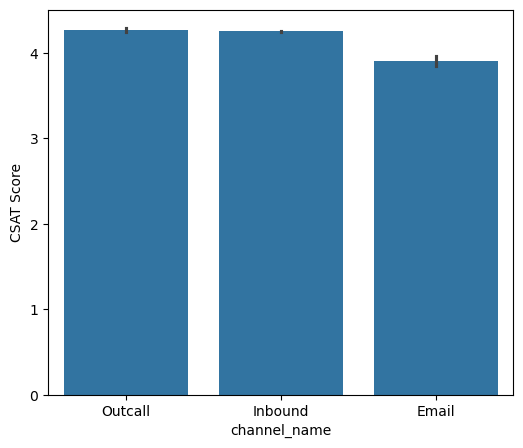

In [141]:
plt.figure(figsize=(6,5))
sns.barplot(data=customer,x='channel_name',y='CSAT Score')
plt.show()

- This bar plot shows the average CSAT score for each channel name, allowing us to see which channels are associated with higher or lower customer satisfaction.

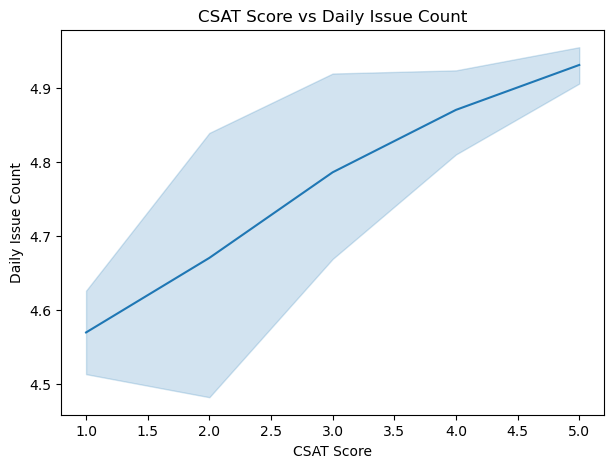

In [143]:
plt.figure(figsize=(7,5))
sns.lineplot(data=customer,x='CSAT Score',y='Daily Issue Count')
plt.xlabel('CSAT Score')
plt.ylabel('Daily Issue Count')
plt.title('CSAT Score vs Daily Issue Count')
plt.show()

- This line plot explores the relationship between CSAT score and the daily issue count, suggesting how the volume of issues might influence customer satisfaction.

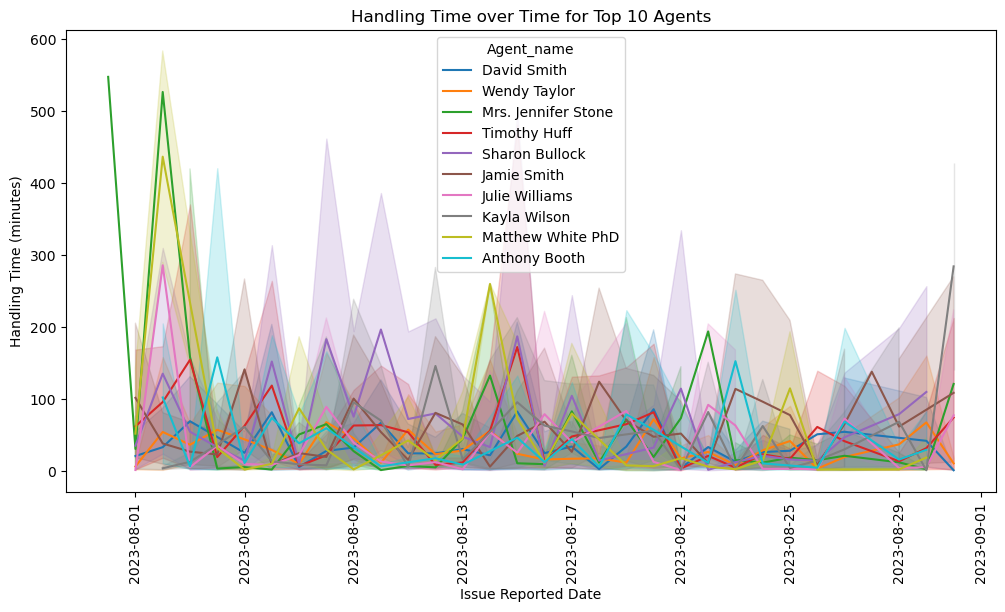

In [145]:
plt.figure(figsize=(12, 6))
top_10_agents_list = customer['Agent_name'].value_counts().nlargest(10).index.tolist()
customer_top_10_agents = customer[customer['Agent_name'].isin(top_10_agents_list)]
sns.lineplot(data=customer_top_10_agents, x='Issue_reported_date', y='Handling_Time_minutes', hue='Agent_name', palette='tab10')
plt.xlabel('Issue Reported Date')
plt.ylabel('Handling Time (minutes)')
plt.title('Handling Time over Time for Top 10 Agents')
plt.xticks(rotation=90)
plt.show()

- This line plot tracks the handling time over time for the top 10 agents, showing how their efficiency might vary over the reporting dates.

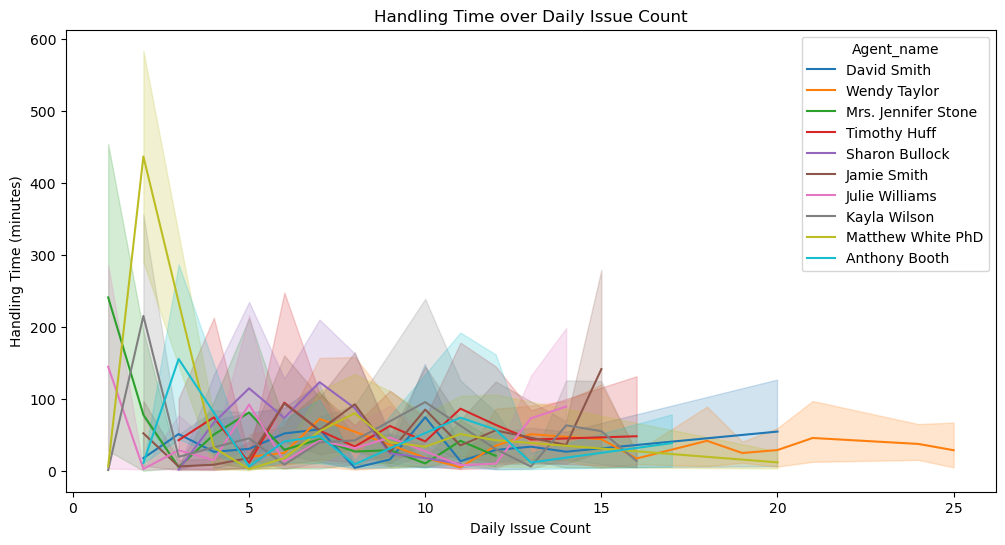

In [147]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_top_10_agents,x='Daily Issue Count',y='Handling_Time_minutes',hue='Agent_name',palette='tab10')
plt.xlabel('Daily Issue Count')
plt.ylabel('Handling Time (minutes)')
plt.title('Handling Time over Daily Issue Count')
plt.show()

- This line plot illustrates the relationship between daily issue count and handling time for the top 10 agents, indicating how workload affects their handling time.

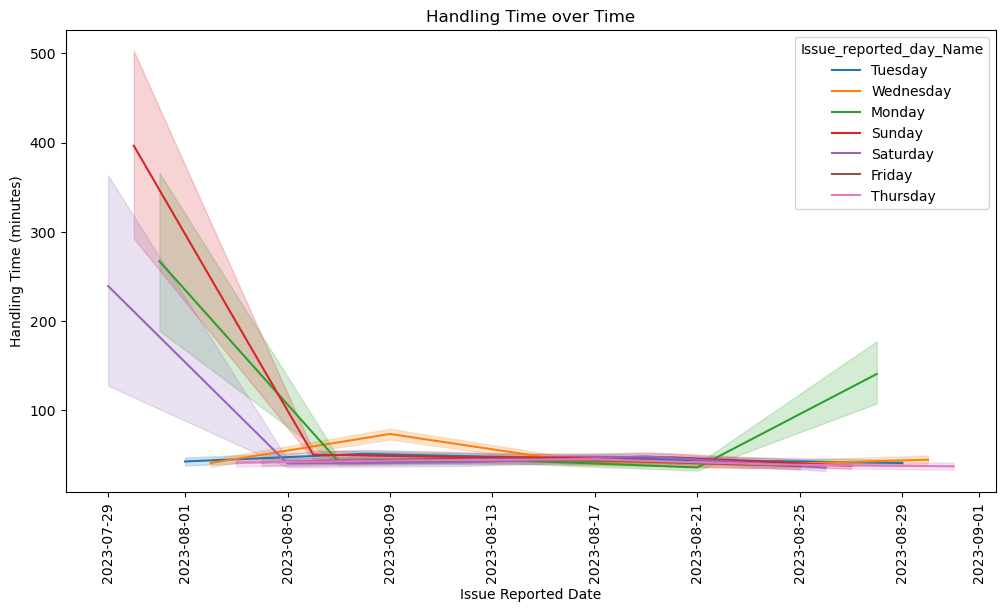

In [149]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer, x='Issue_reported_date', y='Handling_Time_minutes', hue='Issue_reported_day_Name', palette='tab10')
plt.xlabel('Issue Reported Date')
plt.ylabel('Handling Time (minutes)')
plt.title('Handling Time over Time')
plt.xticks(rotation=90)
plt.show()

- This line plot shows the handling time over time, broken down by the day of the week, revealing potential patterns in handling time based on the day.

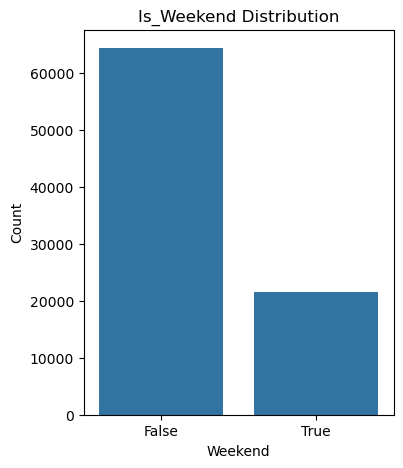

In [151]:
plt.figure(figsize=(4,5))
sns.countplot(data=customer,x='Is_Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Is_Weekend Distribution')
plt.show()

- This count plot shows the distribution of interactions that occurred on weekends versus weekdays, indicating the volume of issues on weekends.

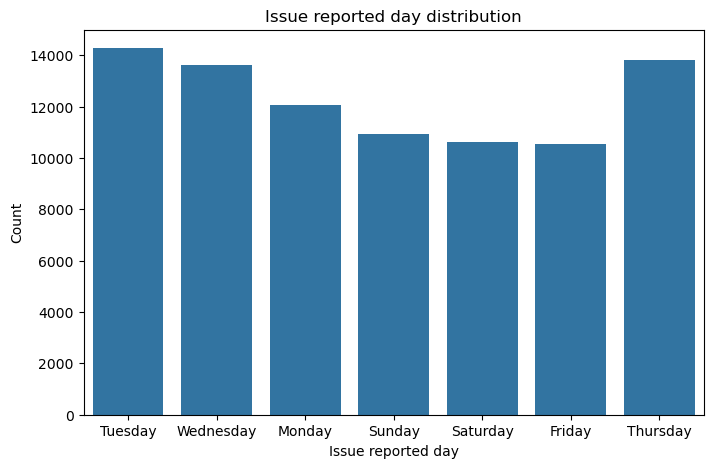

In [153]:
plt.figure(figsize=(8,5))
sns.countplot(data=customer,x='Issue_reported_day_Name')
plt.xlabel("Issue reported day")
plt.ylabel("Count")
plt.title("Issue reported day distribution")
plt.show()

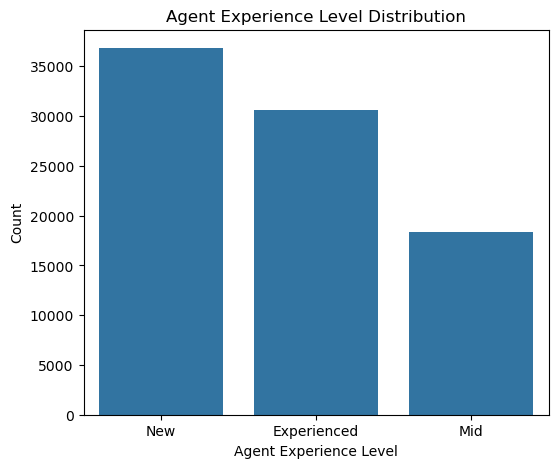

In [154]:
plt.figure(figsize=(6,5))
sns.countplot(data=customer,x='Agent Experience Level')
plt.xlabel('Agent Experience Level')
plt.ylabel('Count')
plt.title('Agent Experience Level Distribution')
plt.show()

- This count plot displays the distribution of issue reported days, showing which days of the week have the highest number of reported issues.

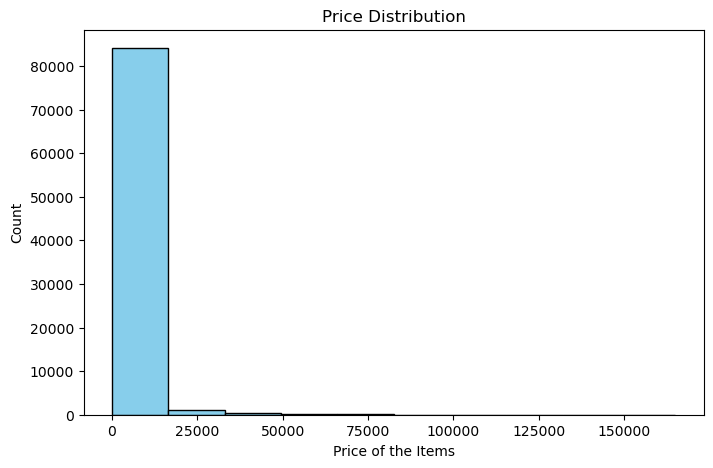

In [156]:
plt.figure(figsize=(8,5))
plt.hist(customer['Item_price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price of the Items')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()


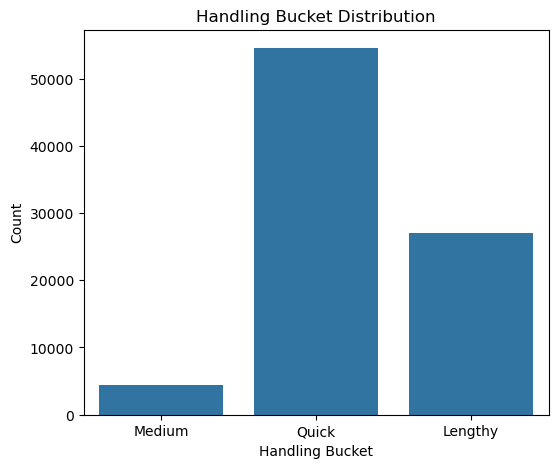

In [157]:
plt.figure(figsize=(6,5))
sns.countplot(data=customer,x='Handling Bucket')
plt.xlabel('Handling Bucket')
plt.ylabel('Count')
plt.title('Handling Bucket Distribution')
plt.show()

- This count plot shows the distribution of handling times categorized into different buckets, giving a summary of how long issues typically take to resolve.

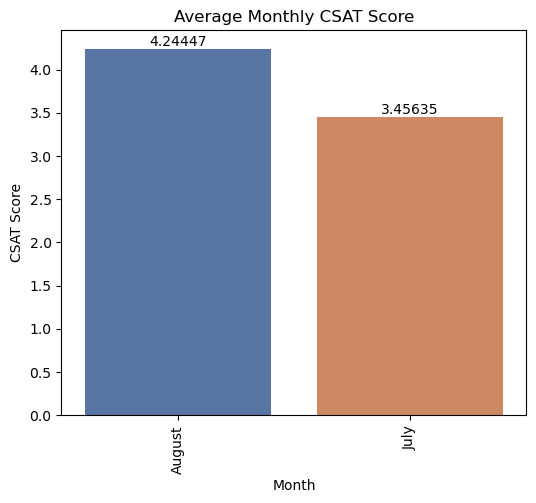

In [159]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=monthly_summary.index,y=monthly_summary.values, palette='deep', hue=monthly_summary.index, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('CSAT Score')
plt.title('Average Monthly CSAT Score')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

- This bar plot shows the average monthly CSAT score, allowing us to see how customer satisfaction fluctuates across months.

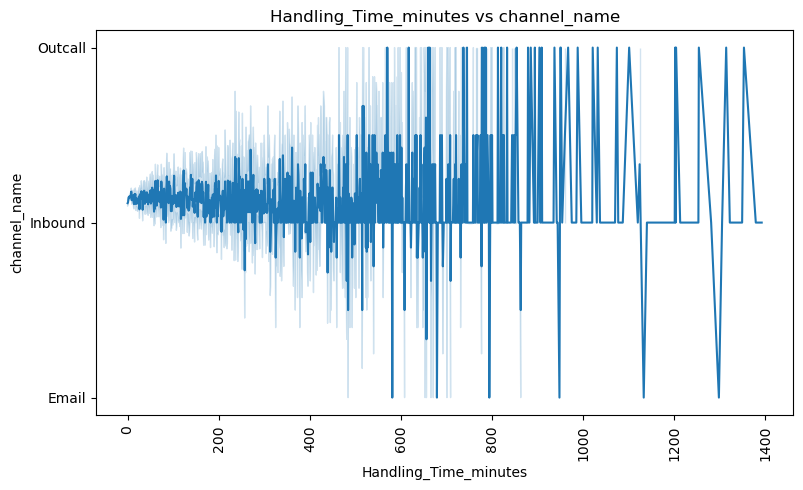

In [161]:
plt.figure(figsize=(9,5))
sns.lineplot(data=customer,x='Handling_Time_minutes',y='channel_name')
plt.xlabel('Handling_Time_minutes')
plt.ylabel('channel_name')
plt.title('Handling_Time_minutes vs channel_name')
plt.xticks(rotation=90)
plt.show()

- This line plot explores the relationship between handling time and channel name, suggesting if certain channels are associated with longer or shorter handling times.

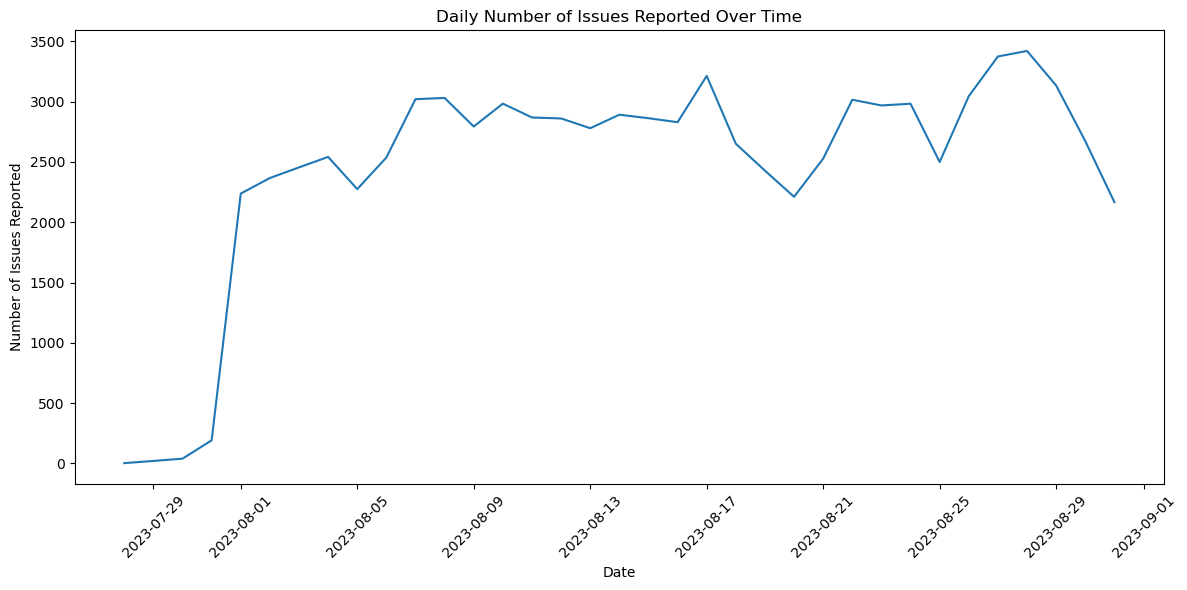

In [163]:
daily_issue_counts = customer['Issue_reported_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_issue_counts)
plt.xlabel('Date')
plt.ylabel('Number of Issues Reported')
plt.title('Daily Number of Issues Reported Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- This line plot shows the daily number of issues reported over time, illustrating the trend in the volume of customer issues.

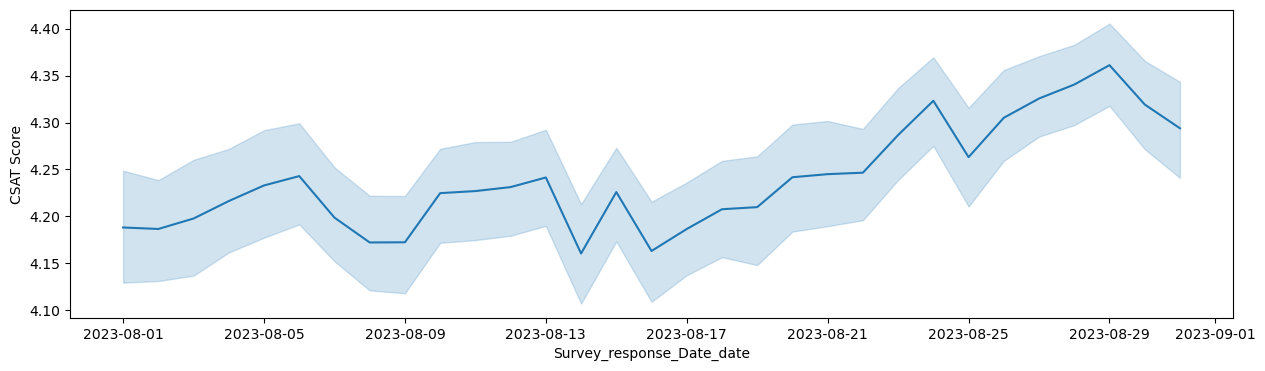

In [165]:
plt.figure(figsize=(15,4))
sns.lineplot(data=customer,x='Survey_response_Date_date',y='CSAT Score')
plt.xlabel('Survey_response_Date_date')
plt.ylabel('CSAT Score')
plt.show()

- This line plot tracks the CSAT score over time based on the survey response date, revealing any trends or patterns in satisfaction scores over the survey period.

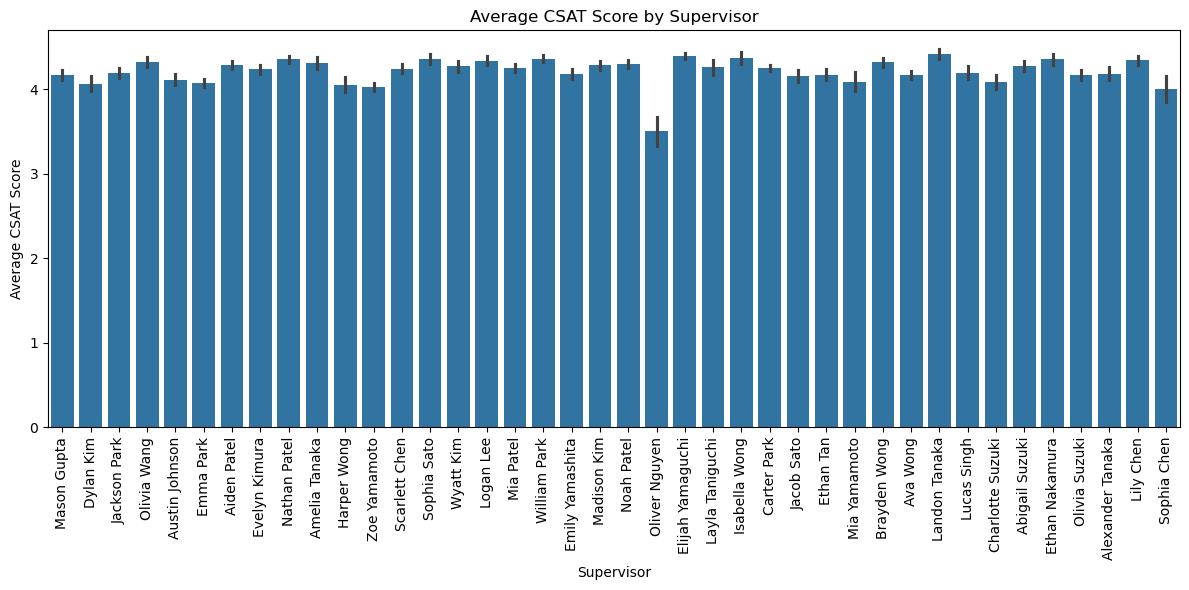

In [167]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer, x='Supervisor', y='CSAT Score')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Average CSAT Score')
plt.title('Average CSAT Score by Supervisor')
plt.tight_layout()
plt.show()

- This bar plot displays the average CSAT score for each supervisor, allowing for a comparison of customer satisfaction levels under different supervisors.

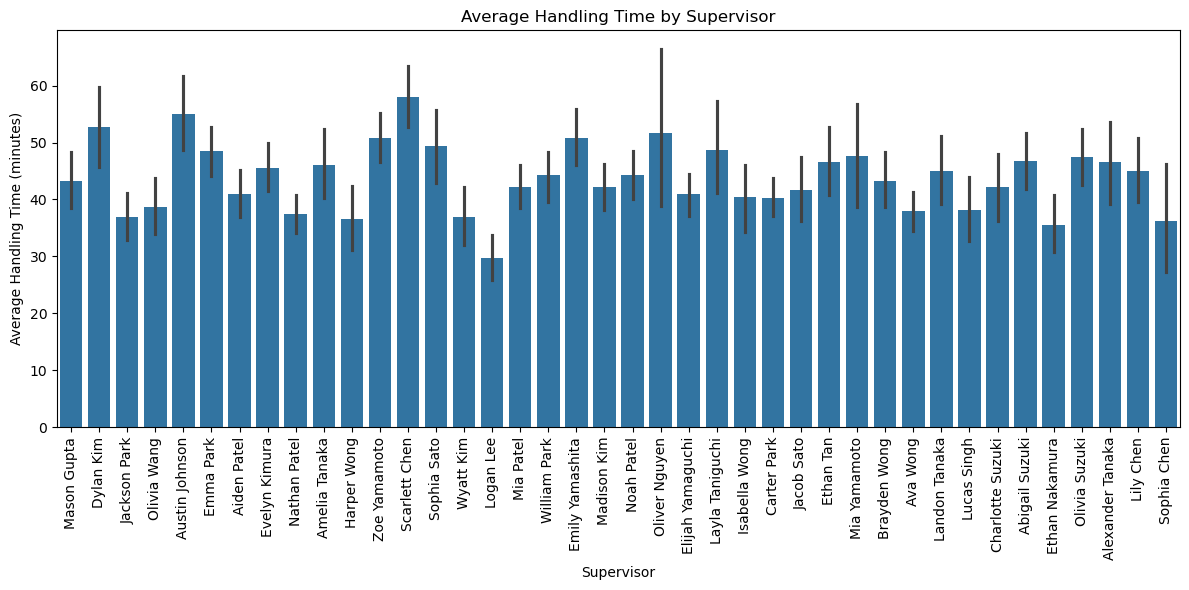

In [169]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer, x='Supervisor', y='Handling_Time_minutes')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Average Handling Time (minutes)')
plt.title('Average Handling Time by Supervisor')
plt.tight_layout()
plt.show()

- This bar plot shows the average handling time for each supervisor, indicating how efficiently issues are handled under different supervisors.

In [171]:
agent_performance = customer.groupby('Agent_name').agg(
    Avg_CSAT=('CSAT Score', 'mean'),
    Avg_Handling_Time=('Handling_Time_minutes', 'mean')
).reset_index()

customer = customer.merge(agent_performance, on='Agent_name', how='left')

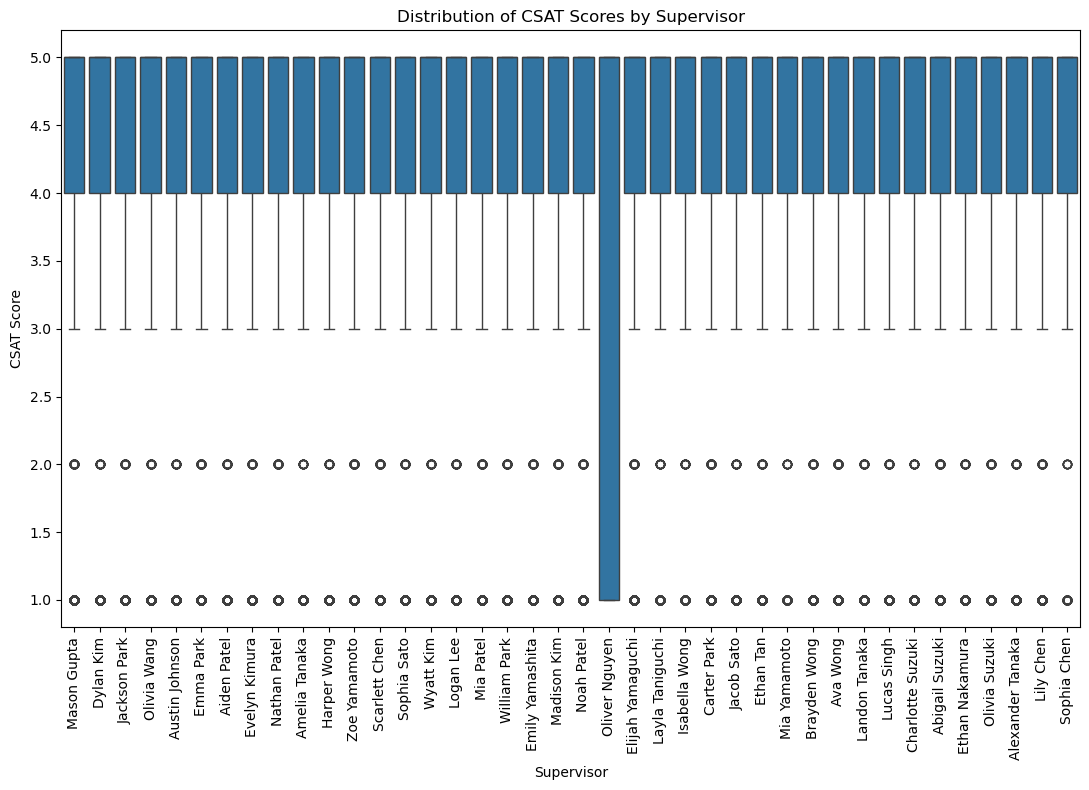

In [172]:
plt.figure(figsize=(11, 8))
sns.boxplot(data=customer, x='Supervisor', y='CSAT Score')
plt.xticks(rotation=90)
plt.title('Distribution of CSAT Scores by Supervisor')
plt.tight_layout()
plt.show()

- This box plot visualizes the distribution of CSAT scores for each supervisor, providing insight into the variability of satisfaction levels within each supervisor's team.

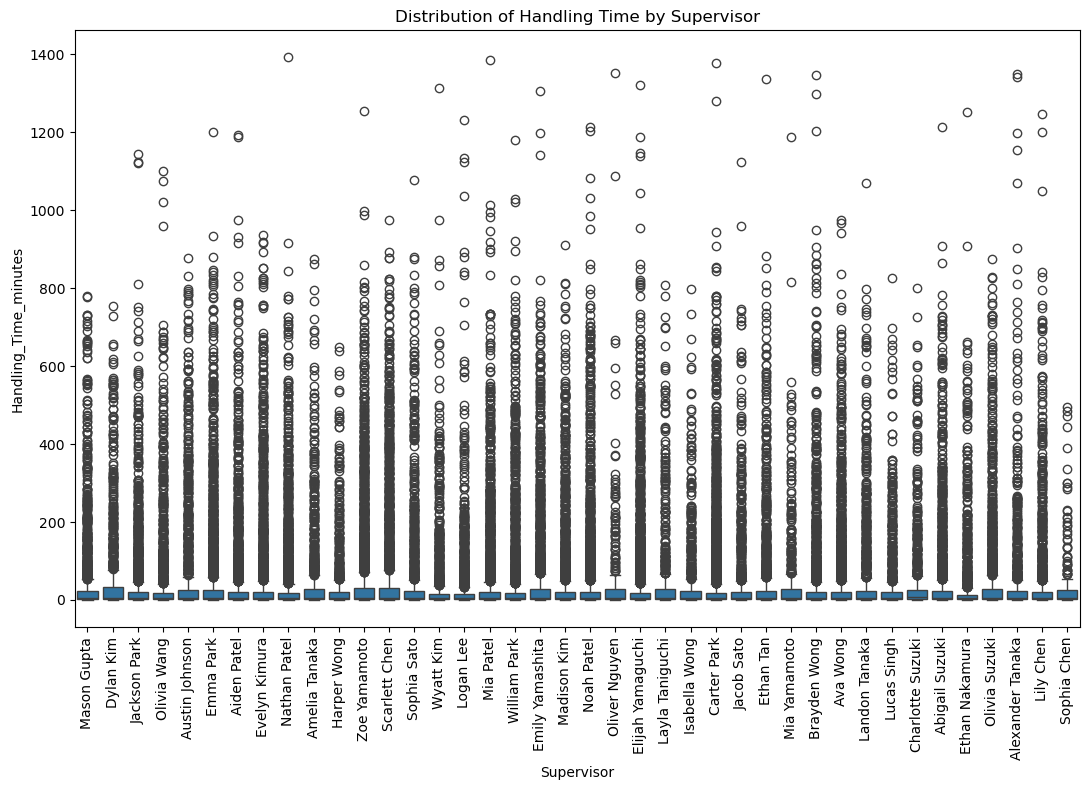

In [174]:
plt.figure(figsize=(11, 8))
sns.boxplot(data=customer, x='Supervisor', y='Handling_Time_minutes')
plt.xticks(rotation=90)
plt.title('Distribution of Handling Time by Supervisor')
plt.tight_layout()
plt.show()

- This box plot displays the distribution of handling time for each supervisor, showing the spread and central tendency of handling times under each supervisor.

## Analyze other factors contributing to csat differences


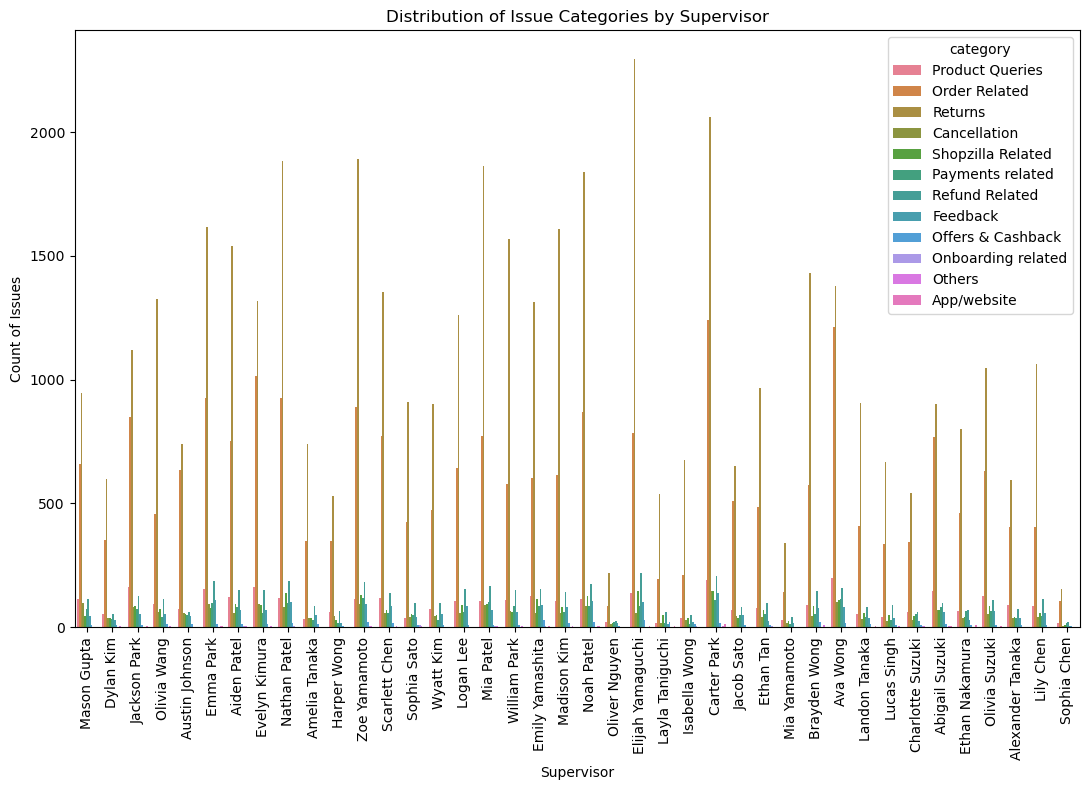

In [177]:
plt.figure(figsize=(11, 8))
sns.countplot(data=customer, x='Supervisor', hue='category')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Count of Issues')
plt.title('Distribution of Issue Categories by Supervisor')
plt.tight_layout()
plt.show()

- This count plot shows the distribution of issue categories by supervisor, highlighting which types of issues are more frequently handled by agents under each supervisor.

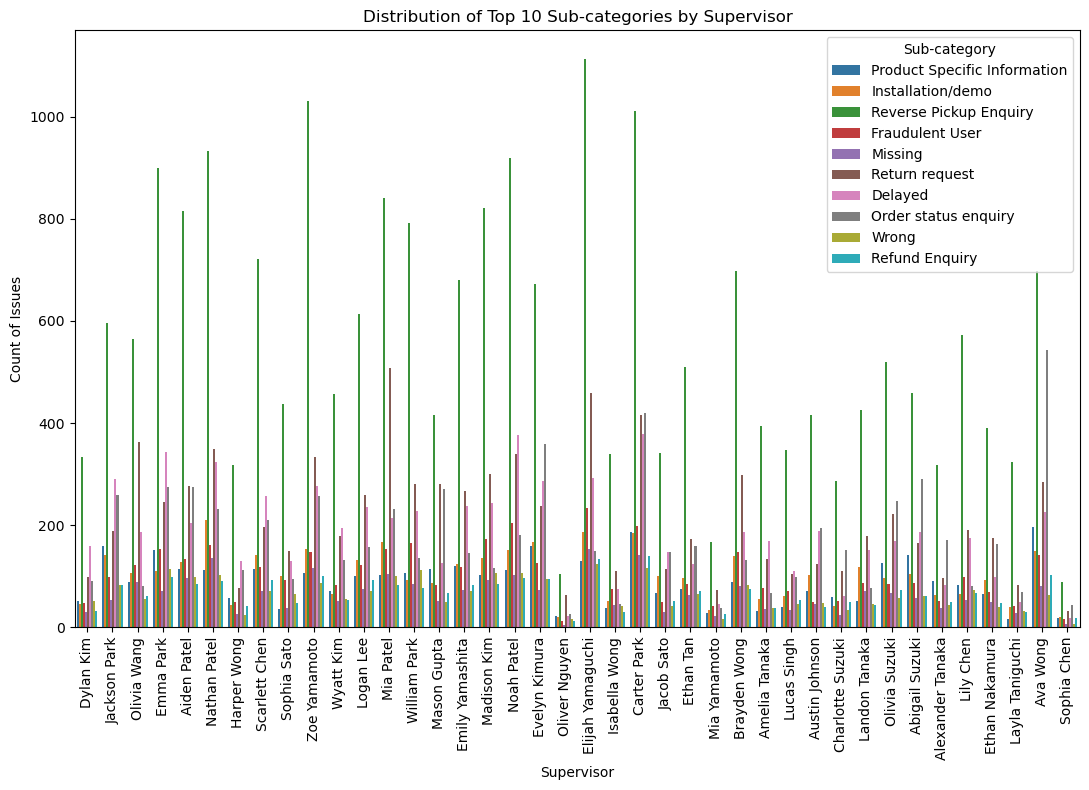

In [179]:
top_10_subcategories = customer['Sub-category'].value_counts().nlargest(10).index.tolist()
customer_top_subcategories = customer[customer['Sub-category'].isin(top_10_subcategories)]
plt.figure(figsize=(11, 8))
sns.countplot(data=customer_top_subcategories, x='Supervisor', hue='Sub-category', palette='tab10')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Count of Issues')
plt.title('Distribution of Top 10 Sub-categories by Supervisor')
plt.tight_layout()
plt.show()

- This count plot illustrates the distribution of the top 10 sub-categories by supervisor, allowing for a detailed look at the specific issue types handled by agents under each supervisor.

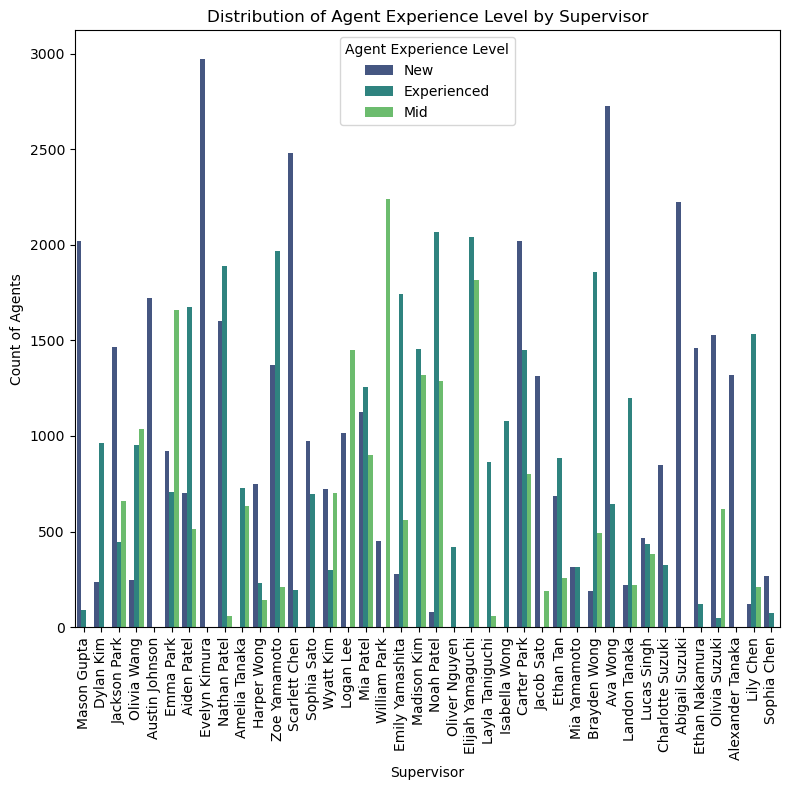

In [181]:
plt.figure(figsize=(8, 8))
sns.countplot(data=customer, x='Supervisor', hue='Agent Experience Level', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Count of Agents')
plt.title('Distribution of Agent Experience Level by Supervisor')
plt.tight_layout()
plt.show()

- This count plot visualizes the distribution of agent experience levels by supervisor, showing the experience mix of agents managed by each supervisor.

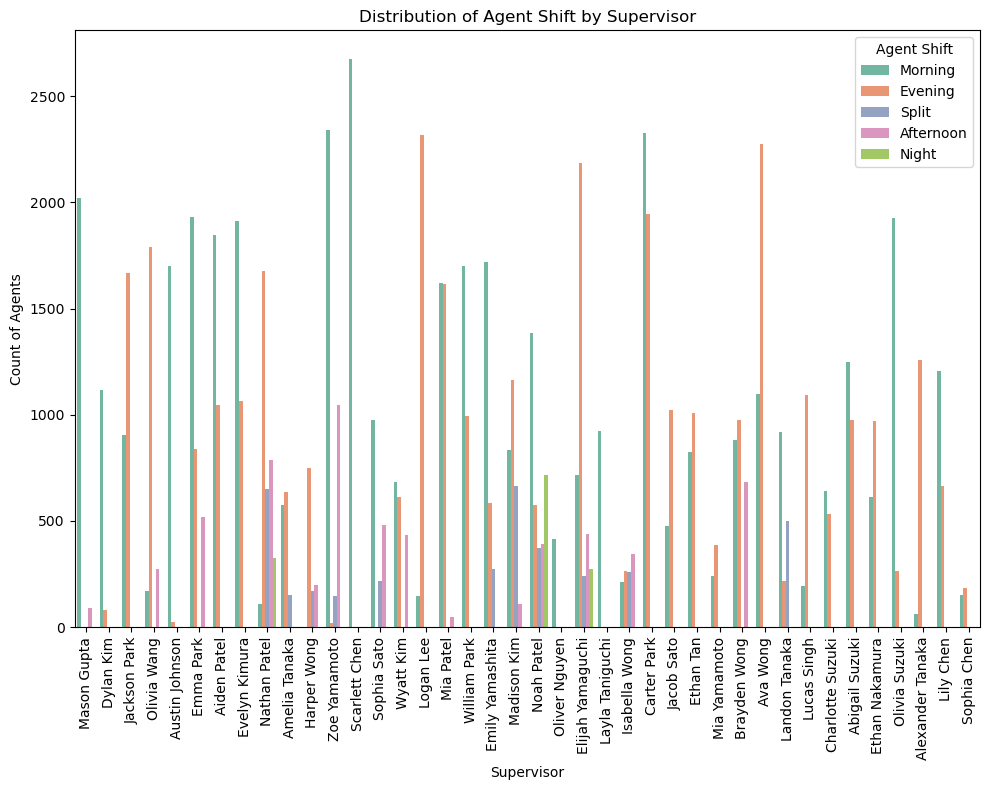

In [183]:
plt.figure(figsize=(10, 8))
sns.countplot(data=customer, x='Supervisor', hue='Agent Shift', palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Count of Agents')
plt.title('Distribution of Agent Shift by Supervisor')
plt.tight_layout()
plt.show()

- This count plot displays the distribution of agent shifts by supervisor, indicating the shift patterns of agents managed by each supervisor.

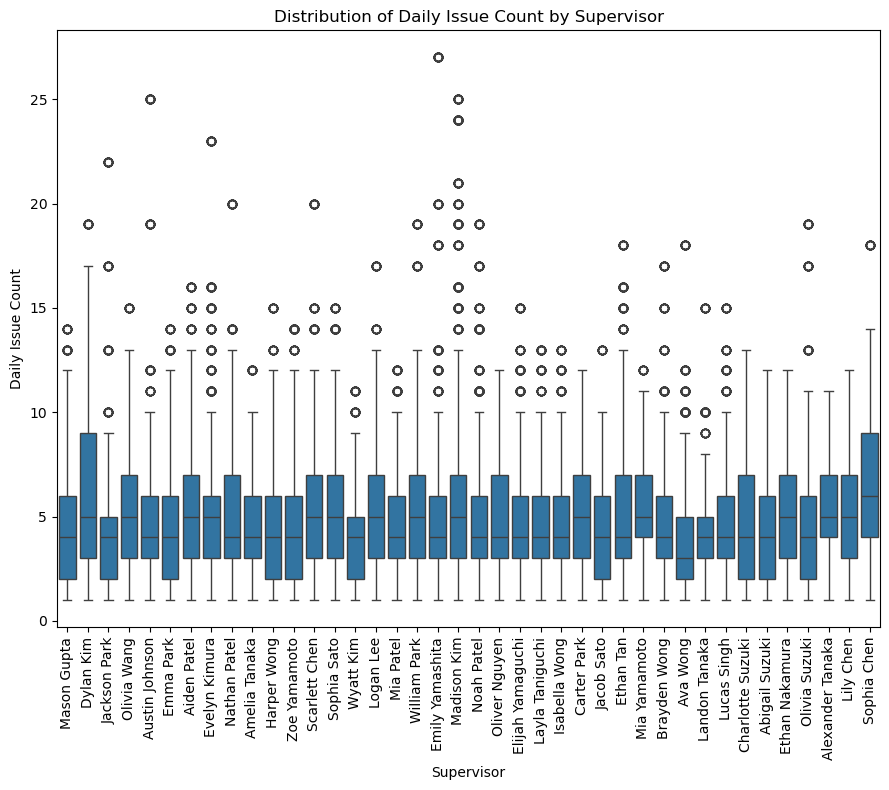

In [185]:
plt.figure(figsize=(9, 8))
sns.boxplot(data=customer, x='Supervisor', y='Daily Issue Count')
plt.xticks(rotation=90)
plt.xlabel('Supervisor')
plt.ylabel('Daily Issue Count')
plt.title('Distribution of Daily Issue Count by Supervisor')
plt.tight_layout()
plt.show()

- This box plot shows the distribution of daily issue count by supervisor, providing insight into the workload distribution among supervisors' teams.

In [187]:
customer.drop(columns=['Unique id','Order_id','Agent_name','Supervisor','Manager','Issue_reported_time','issue_responded_time','Survey_response_Date_time'],axis=1,inplace=True)

In [188]:
customer['CSAT Score'].value_counts()

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64

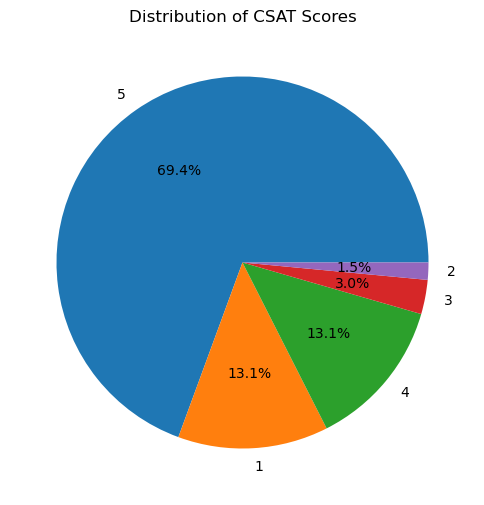

In [189]:
plt.figure(figsize=(6,8))
plt.pie(customer['CSAT Score'].value_counts().values, labels=customer['CSAT Score'].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.title('Distribution of CSAT Scores')
plt.show()

- This pie chart shows the distribution of CSAT scores, providing a clear visual representation of the proportion of each satisfaction rating.


## Outlier Detection
### Identify the presence of any outlier through the boxplot 

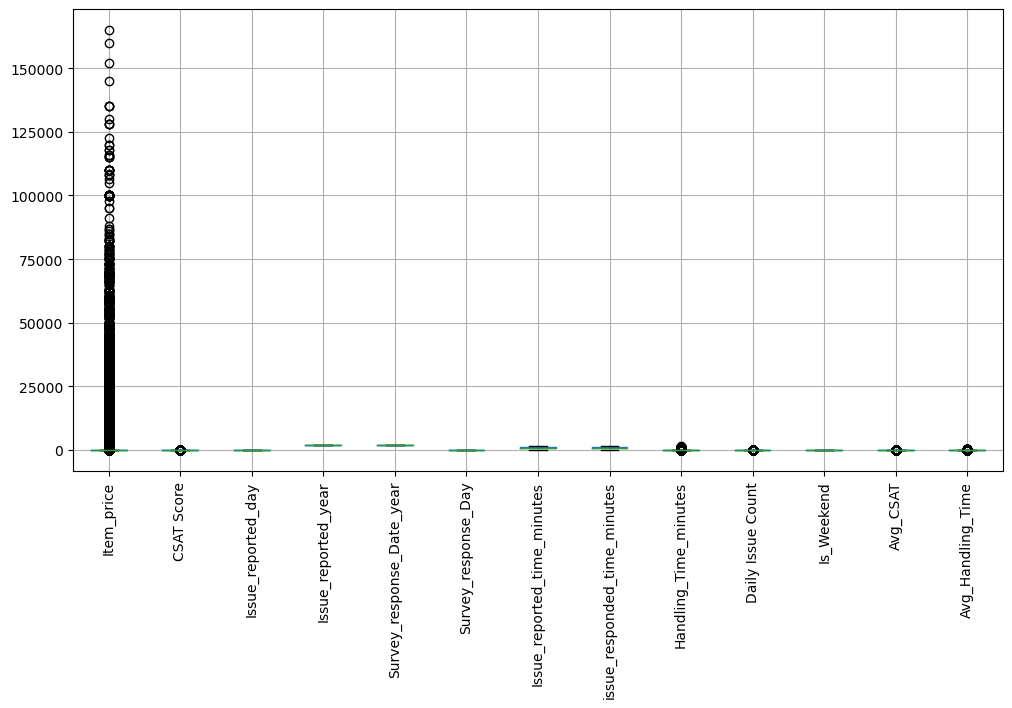

In [192]:
plt.figure(figsize=(12,6))
customer.boxplot()
plt.xticks(rotation=90)
plt.show()


 Analyzing column: Handling_Time_minutes
  Number of outliers: 12424
  Percentage of outliers: 14.46%
  Clipping bounds: [-29.50, 54.50]


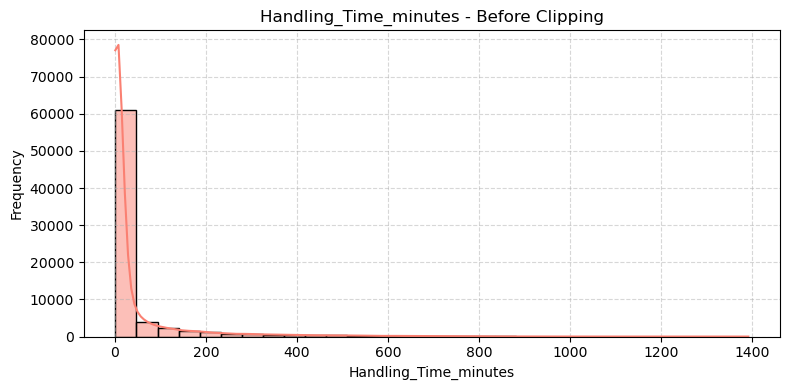

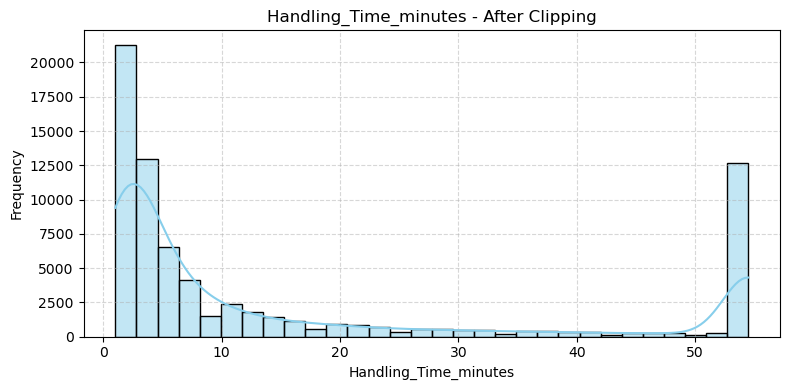


 Analyzing column: Avg_Handling_Time
  Number of outliers: 1458
  Percentage of outliers: 1.70%
  Clipping bounds: [-8.65, 92.05]


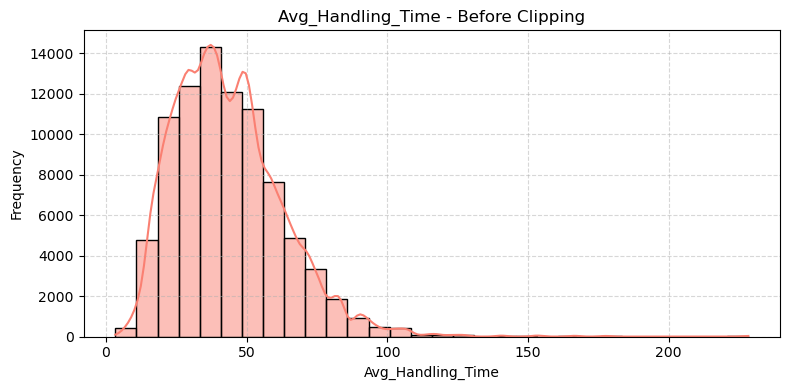

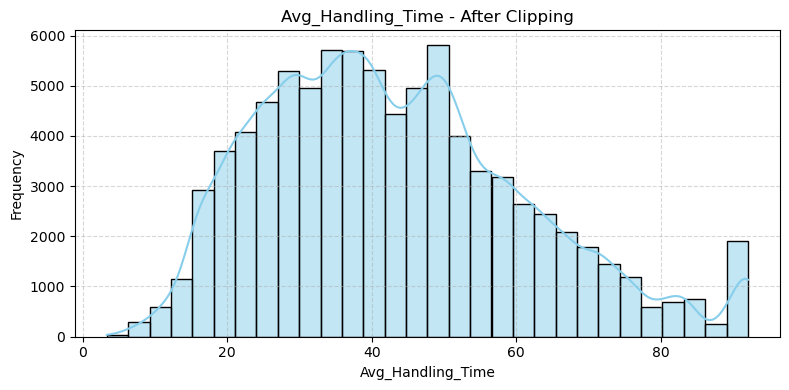

In [193]:
# Columns to check for outliers (excluding zeros)
cols_to_check = ['Handling_Time_minutes', 'Avg_Handling_Time']

for col in cols_to_check:
    print(f"\n Analyzing column: {col}")

    # Exclude zero values for accurate IQR
    non_zero_data = customer[customer[col] != 0][col]

    # Compute Q1, Q3, IQR
    Q1 = non_zero_data.quantile(0.25)
    Q3 = non_zero_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = customer[
        (customer[col] != 0) &
        ((customer[col] < lower_bound) | (customer[col] > upper_bound))
    ]

    # Print outlier stats
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(customer) * 100:.2f}%")
    print(f"  Clipping bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

    # Histogram before clipping
    plt.figure(figsize=(8, 4))
    sns.histplot(non_zero_data, bins=30, kde=True, color='salmon')
    plt.title(f"{col} - Before Clipping")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Clip the column
    customer[col] = customer[col].clip(lower=lower_bound, upper=upper_bound)

    # Histogram after clipping
    clipped_data = customer[customer[col] != 0][col]
    plt.figure(figsize=(8, 4))
    sns.histplot(clipped_data, bins=30, kde=True, color='skyblue')
    plt.title(f"{col} - After Clipping")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


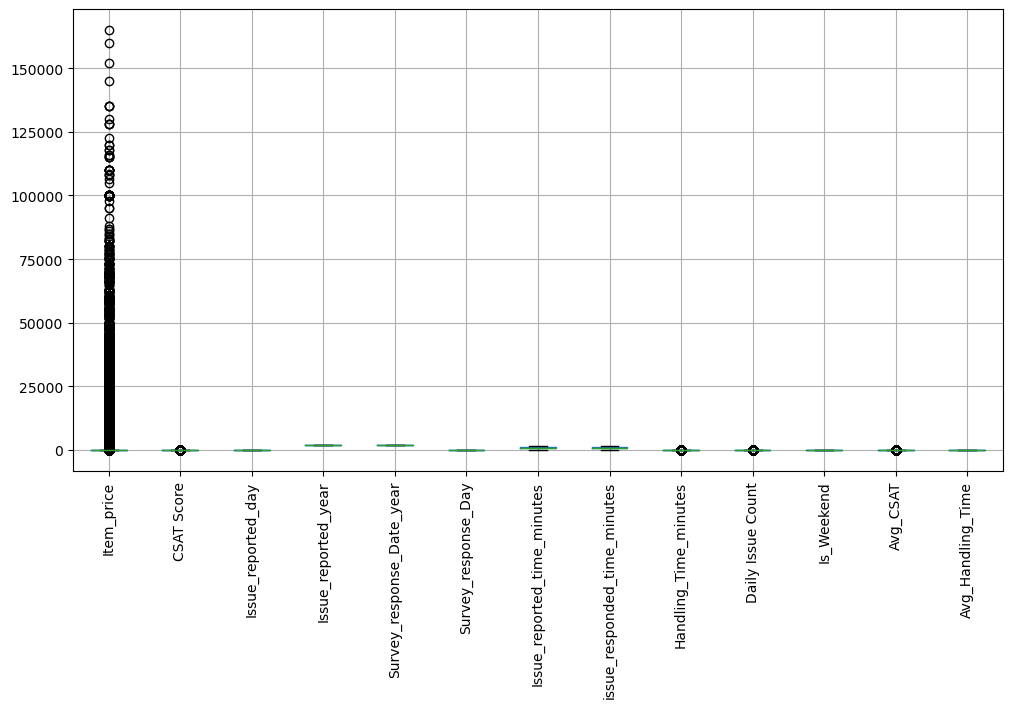

In [194]:
plt.figure(figsize=(12,6))
customer.boxplot()
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis

-  Droping these columns because all the values in these columns are the same (2023.0), which has no variation and may lead to nan values and effect the corr matrix for other columns

In [197]:
customer.drop(columns=['Item_price','Issue_reported_year', 'Survey_response_Date_year'], inplace=True)

# Recalculate and display the correlation matrix
numerical_cols = customer.select_dtypes(include=np.number).columns
correlation_matrix = customer[numerical_cols].corr()
display(correlation_matrix)

,CSAT Score,Issue_reported_day,Survey_response_Day,Issue_reported_time_minutes,issue_responded_time_minutes,Handling_Time_minutes,Daily Issue Count,Avg_CSAT,Avg_Handling_Time
CSAT Score,1.000000,0.032277,0.031629,0.009409,-0.001347,-0.177424,0.039989,0.247243,-0.073695
Issue_reported_day,0.032277,1.000000,0.982538,-0.019215,-0.147036,-0.024663,0.065537,-0.057652,-0.009612
Survey_response_Day,0.031629,0.982538,1.000000,-0.018346,-0.150067,-0.022442,0.076126,-0.057853,-0.009625
Issue_reported_time_minutes,0.009409,-0.019215,-0.018346,1.000000,0.636801,-0.095848,-0.002983,0.020700,-0.243209
issue_responded_time_minutes,-0.001347,-0.147036,-0.150067,0.636801,1.000000,0.156909,-0.030668,0.021408,-0.130992
Handling_Time_minutes,-0.177424,-0.024663,-0.022442,-0.095848,0.156909,1.000000,-0.032615,-0.081602,0.137466
Daily Issue Count,0.039989,0.065537,0.076126,-0.002983,-0.030668,-0.032615,1.000000,0.097715,-0.053453
Avg_CSAT,0.247243,-0.057652,-0.057853,0.020700,0.021408,-0.081602,0.097715,1.000000,-0.298066
Avg_Handling_Time,-0.073695,-0.009612,-0.009625,-0.243209,-0.130992,0.137466,-0.053453,-0.298066,1.000000


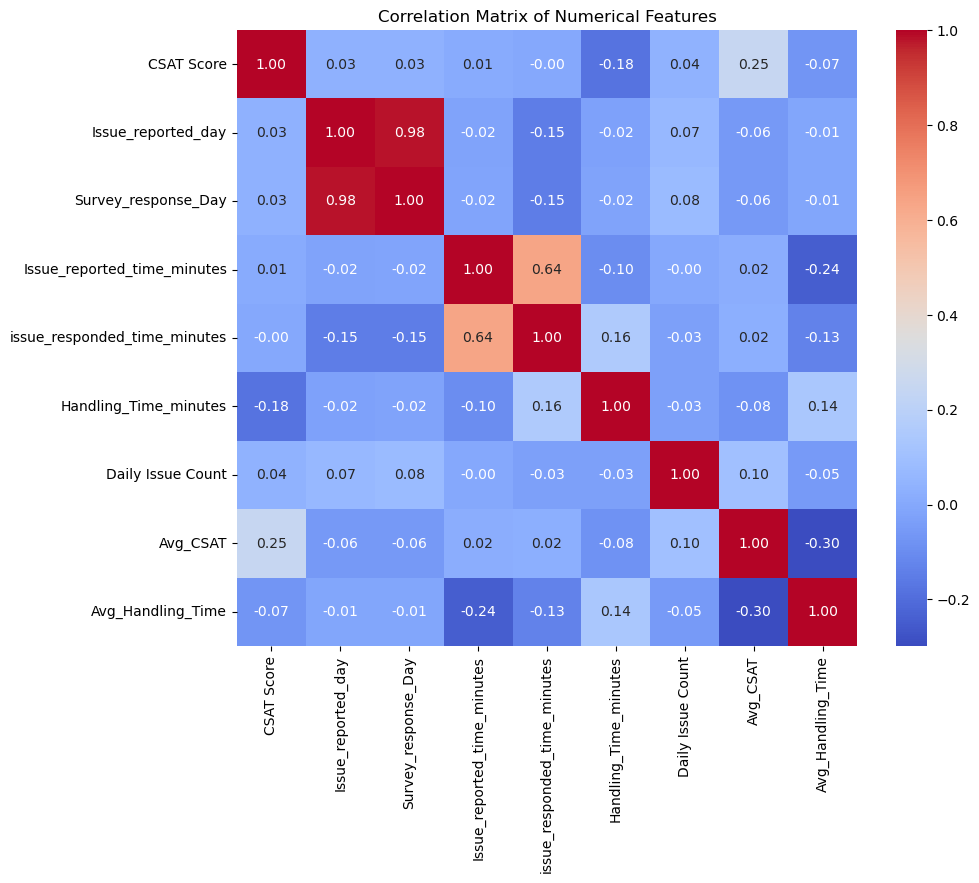

In [198]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Detecting Multicollinearity

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numerical columns, excluding the target variable 'CSAT Score'
numerical_cols_for_vif = customer.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_vif.remove('CSAT Score')
numerical_data_for_vif = customer[numerical_cols_for_vif]

# Drop rows with NaN values in numerical columns before calculating VIF
numerical_data_cleaned_vif = numerical_data_for_vif.dropna()

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data_cleaned_vif.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data_cleaned_vif.values, i) for i in range(numerical_data_cleaned_vif.shape[1])]

display(vif_data)

,Feature,VIF
0,Issue_reported_day,566.512309
1,Survey_response_Day,567.182619
2,Issue_reported_time_minutes,133.438101
3,issue_responded_time_minutes,148.760784
4,Handling_Time_minutes,3.008255
5,Daily Issue Count,3.646359
6,Avg_CSAT,21.161850
7,Avg_Handling_Time,6.104888


- vif =1 means no multicollinearity
- vif < 5 can be accepted
- vif 5 - 10 moderate , may need correction
- vif >10 - highly multicollinear

- So in this connected_handling_time and csat score are moderate , we can remove the connected_handling_time column

In [202]:
customer = customer.drop(columns=['Issue_reported_day','Survey_response_Day'],axis=1)

In [203]:
customer['Handling_Time_minutes'] = customer['Handling_Time_minutes'].bfill()

In [204]:
customer['Issue_reported_time_minutes'] = np.log1p(customer['Issue_reported_time_minutes'])
customer['issue_responded_time_minutes'] = np.log1p(customer['issue_responded_time_minutes'])
customer['Handling_Time_minutes'] = np.log1p(customer['Handling_Time_minutes'])
customer['Daily Issue Count'] = np.log1p(customer['Daily Issue Count'])

#### Removing the not useful col as they are derived only for the visualization purpose

In [206]:
customer = customer.drop(columns=['Daily Issue Count'],axis=1)

In [207]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   channel_name                  85907 non-null  object        
 1   category                      85907 non-null  object        
 2   Sub-category                  85907 non-null  object        
 3   Customer Remarks              28742 non-null  object        
 4   Customer_City                 85907 non-null  object        
 5   Product_category              85907 non-null  object        
 6   Tenure Bucket                 85907 non-null  object        
 7   Agent Shift                   85907 non-null  object        
 8   CSAT Score                    85907 non-null  int64         
 9   Issue_reported_date           85907 non-null  datetime64[ns]
 10  Issue_reported_day_Name       85907 non-null  object        
 11  Issue_reported_month        

In [208]:
customer = customer.drop(columns=['Is_Weekend','Avg_CSAT','Avg_Handling_Time'],axis=1)

In [209]:
customer.head()

,channel_name,category,Sub-category,Customer Remarks,Customer_City,Product_category,Tenure Bucket,Agent Shift,CSAT Score,Issue_reported_date,...,Issue_reported_month,issue_responded_date,Survey_response_Date_date,Survey_response_Day_Name,Survey_response_Date_month,Issue_reported_time_minutes,issue_responded_time_minutes,Handling_Time_minutes,Agent Experience Level,Handling Bucket
0,Outcall,Product Queries,Life Insurance,NaN,Not Given,Not Available,On Job Training,Morning,5,2023-08-01,...,August,2023-08-01,2023-08-01,Tuesday,August,6.513230,6.562444,3.555348,New,Medium
1,Outcall,Product Queries,Product Specific Information,NaN,Not Given,Not Available,>90,Morning,5,2023-08-01,...,August,2023-08-01,2023-08-01,Tuesday,August,6.650279,6.652863,1.098612,Experienced,Quick
2,Inbound,Order Related,Installation/demo,NaN,Not Given,Not Available,On Job Training,Evening,5,2023-08-01,...,August,2023-08-01,2023-08-01,Tuesday,August,7.104144,7.122060,3.135494,New,Medium
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,Not Given,Not Available,>90,Evening,5,2023-08-01,...,August,2023-08-01,2023-08-01,Tuesday,August,7.136483,7.152269,3.044522,Experienced,Quick
4,Inbound,Cancellation,Not Needed,NaN,Not Given,Not Available,0-30,Morning,5,2023-08-01,...,August,2023-08-01,2023-08-01,Tuesday,August,6.447306,6.450470,1.098612,New,Quick


#### “This notebook is complete, see the next notebook for continuation.”